In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import FormatStrFormatter

In [2]:
import json
import os

In [3]:
# JSON file containing the results for this simulation run
results_file = "/Users/brianmccarthy/git_repos/results-analysis/configs/cv2x.json"

In [4]:
with open(results_file) as results_json:
    config = json.load(results_json)["cv2x"]

In [5]:
# Markers to use for this run
markers = [".", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h",
           "H", "+", "x", "X", "D", "d", "|", "_", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [6]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning.
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    bins = []
    for low in range(lower_bound, lower_bound + quantity * width + 1, width):
        bins.append((low, low + width))
    return bins

In [7]:
def bin_fields(df, fields, bin_width=10, bin_quantity=49):
    """
    Bins multiple dfs into a single dictionary that can be used as an average for multiple fields across multiple
    runs
    :param df: dataframe to bin
    :param fields: fields to be binned.
    :param bin_width: width of each bin
    :param bin_quantity: total number of bins
    :return:
    """
    bins = create_bins(lower_bound=0, width=bin_width, quantity=bin_quantity)
    distances = []
    overall_fields = {}
    for interval in bins:
        upper_b = interval[1]
        distances.append(upper_b)

    for field in fields:
        overall_fields[field] = []

    overall_fields["distance"] = distances

    distance_col = config["results"]["distance"]

    for i in range(len(bins)):
        lower_b = bins[i][0]
        upper_b = bins[i][1]
        fields_temp = df[(df[distance_col] >= lower_b) & (df[distance_col] < upper_b)]
        for field in fields:
            if i < len(overall_fields[field]):
                overall_fields[field][i] = (fields_temp[field].mean() + overall_fields[field][i]) / 2
            else:
                overall_fields[field].append(fields_temp[field].mean())

    return overall_fields

In [8]:
def pdr_dist_individual(pdr, distances, label, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    ax.plot(distances, pdr, label=label, marker=markers[0], markevery=3)

    ax.set(xlabel='Distance (m)', ylabel='Packet Delivery Rate (PDR) %')
    ax.legend(loc='lower right')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 100])
    plt.yticks(np.arange(0, 101, step=10))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name))

In [9]:
def pdr_dist(pdrs, distances, labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    for i in range(len(pdrs)):
        ax.plot(distances, pdrs[i], label=labels[i])

    ax.set(xlabel='Distance (m)', ylabel='Packet Delivery Rate (PDR) %')
    ax.legend(loc='lower left')
    ax.tick_params(direction='in')
    
    ax.set_ylim([0, 100])
    plt.yticks(np.arange(0, 101, step=10))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name))

In [10]:
def errors_dist_individual(distances, decoded, errors, error_labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    ax.plot(distances, decoded, label="Decoded", marker=self.markers[0], markevery=3)

    for i in range(len(errors)):
        ax.plot(distances, errors[i], label=error_labels[i], marker=self.markers[i+1], markevery=3)

    ax.legend(loc='center left')
    ax.set(xlabel='Distance (m)', ylabel='Messages Decoded')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 1])
    plt.yticks(np.arange(0, 1.1, step=.1))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))

    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()

    if store:
        fig.savefig("{}.png".format(plot_name))

In [11]:
def errors_dist(distances, decoded, decoded_labels, errors, error_labels, plot_name, show=True, store=False):
    fig, ax = plt.subplots()

    for i in range(len(decoded)):
        ax.plot(distances, decoded[i], label=decoded_labels[i], marker=self.markers[i], markevery=3)

        for j in range(len(errors[i])):
            ax.plot(distances, errors[i][j], label=error_labels[i][j], marker=self.markers[i + j])

    ax.legend(loc='center left')
    ax.set(xlabel='Distance (m)', ylabel='Messages Decoded')
    ax.tick_params(direction='in')

    ax.set_ylim([0, 1])
    plt.yticks(np.arange(0, 1.1, step=.1))

    ax.set_xlim([0, (max(distances) + 1)])
    plt.xticks(np.arange(0, (max(distances) + 1), step=50))
    
    fig.suptitle(plot_name, fontsize=12)
    
    if show:
        fig.show()
        
    if store:
        fig.savefig("{}.png".format(plot_name))

### Parse the results into DF

- Periodic results
- Non-periodic results
- DCC results
- Non-DCC results

In [12]:
def read_data_in(folder):
    first_file = True
    merged_df = pd.DataFrame()
    files = os.listdir(folder)
    files.sort()
    num_files = (len(files))
    count = 0
    for file in files:
        if count % 5 == 0:
            print("File {}/{}".format(count, num_files))
        if ".csv" in file:
            result_file = os.path.join(folder, file)
            if first_file:
                merged_df = pd.read_csv(result_file)
                first_file = False
            else:
                try:
                    merged_df.append(pd.read_csv(result_file))
                except pd.errors.ParserError as e:
                    print("Failed to parse file: {}".format(file))
        count+=1
    return merged_df

In [15]:
raw_data_folder = "/Users/brianmccarthy/git_repos/results-analysis/data/raw_data/cv2x/"
interested_folder = ["dcc-enabled", "dcc-disabled", "internal-dcc", "After-2"]
loaded_dfs = {}

In [16]:
for folder in os.listdir(raw_data_folder):
    if folder in interested_folder:
        print("="*50)
        print("Parsing configuration: {}".format(folder))
        print("="*50)
        loaded_dfs[folder] = read_data_in(os.path.join(raw_data_folder, folder))

Parsing configuration: dcc-disabled
Parsing configuration: internal-dcc
Parsing configuration: dcc-enabled
Parsing configuration: After-2


In [ ]:
extra_folders = ["After-5"]
for folder in os.listdir(raw_data_folder):
    if folder in interested_folder:
        print("="*50)
        print("Parsing configuration: {}".format(folder))
        print("="*50)
        loaded_dfs[folder] = read_data_in(os.path.join(raw_data_folder, folder))

In [34]:
distances = create_bins(0, 10, 49)

In [35]:
for i in range(len(distances)):
    distances[i] = distances[i][1]

In [36]:
pdrs = {}
for configuration in interested_folder:
    df = loaded_dfs[configuration]
    
    # Filter the times down
    df = df[df["Time"] > 502]
    
    # Put config back into our dictionary
    loaded_dfs[configuration] = df
    
    # Calculate pdr
    pdr = []
    binned_fields = bin_fields(df, ["tbDecoded"])
    for i in range(len(binned_fields["tbDecoded"])):
        if i < len(pdr):
            pdr[i] = (binned_fields["tbDecoded"][i] + pdr[i]) / 2
        else:
            pdr.append(binned_fields["tbDecoded"][i])
            
    for i in range(len(pdr)):
        pdr[i] = pdr[i] * 100
    pdrs[configuration] = pdr

In [38]:
non_v_periodic = []
# non_v_periodic.append(pdrs["non-periodic"])
# non_v_periodic.append(pdrs["periodic-300ms"])

dcc = []
dcc.append(pdrs["dcc-enabled"])
dcc.append(pdrs["dcc-disabled"])
dcc.append(pdrs["internal-dcc"])
dcc.append(pdrs["After-2"])

In [ ]:
pdr_dist(non_v_periodic, distances, ["Non-periodic", "Periodic"], "periodicity", show=True, store=True)

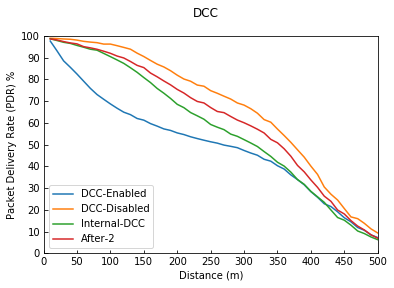

In [39]:
pdr_dist(dcc, distances, ["DCC-Enabled", "DCC-Disabled", "Internal-DCC", "After-2", "After-5", "After-9"], "DCC", show=True, store=True)

### CBR 

Comparing CBR levels in DCC vs Non-DCC scenarios

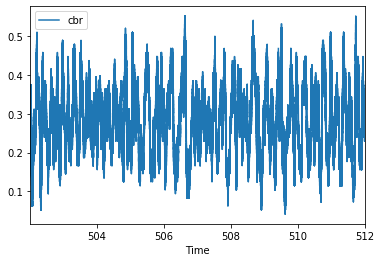

In [147]:
loaded_dfs["dcc-enabled"].plot(x="Time", y="cbr", kind="line")

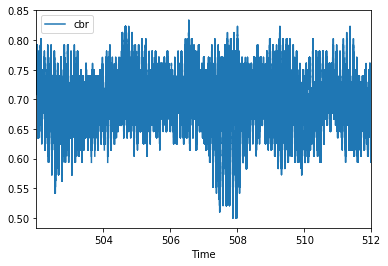

In [148]:
loaded_dfs["dcc-disabled"].plot(x="Time", y="cbr", kind="line")

In [176]:
dcc_enabled_df  = loaded_dfs["dcc-enabled"]
dcc_disabled_df = loaded_dfs["dcc-disabled"]
periodic_df  = loaded_dfs["periodic-300ms"]
non_periodic_df = loaded_dfs["non-periodic"]

In [150]:
node_50_dcc_enabled_df = dcc_enabled_df[(dcc_enabled_df["NodeID"] == 50) & (dcc_enabled_df["cbr"] >= 0.0)]
node_50_dcc_disabled_df = dcc_disabled_df[(dcc_disabled_df["NodeID"] == 50) & (dcc_disabled_df["cbr"] >= 0.0)]

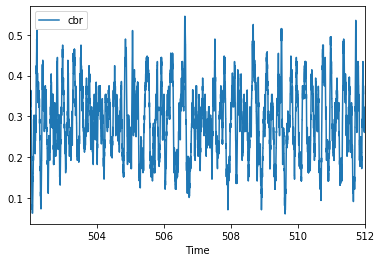

In [151]:
node_50_dcc_enabled_df.plot(x="Time", y="cbr", kind="line")

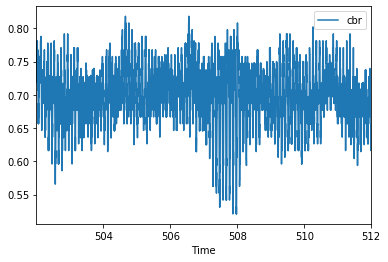

In [152]:
node_50_dcc_disabled_df.plot(x="Time", y="cbr", kind="line")

In [174]:
print("="* 27)
print("DCC Disabled Statistics")
print("mean  : {}".format(node_50_dcc_disabled_df["cbr"].mean()))
print("std   : {}".format(node_50_dcc_disabled_df["cbr"].std()))
print("median: {}".format(node_50_dcc_disabled_df["cbr"].median()))

print("="* 27)

print("DCC Enabled Statistics")
print("mean  : {}".format(node_50_dcc_enabled_df["cbr"].mean()))
print("std   : {}".format(node_50_dcc_enabled_df["cbr"].std()))
print("median: {}".format(node_50_dcc_enabled_df["cbr"].median()))
print("="* 27)

DCC Disabled Statistics
mean  : 0.6994518308080827
std   : 0.0428511104417195
median: 0.69791666666667
DCC Enabled Statistics
mean  : 0.2888711805555535
std   : 0.08725382430730265
median: 0.29166666666667


### Grant breaking

In [162]:
print("Generated grants: {}".format(dcc_disabled_df["grantStartTime"].count()))
print("Broken grants: {}".format(dcc_disabled_df["grantBreak"].count()))

Generated grants: 1028
Broken grants: 1028


In [166]:
# Higher due to the issue of starting at 502
print("Generated Grants: {}".format(dcc_enabled_df["grantStartTime"].count()))
print("Broken Grants: {}".format(dcc_enabled_df["grantBreakMissedTrans"].count()))

Generated Grants: 9551
Broken Grants: 9598


In [177]:
print("Generated grants: {}".format(periodic_df["grantStartTime"].count()))
print("Broken grants: {}".format(periodic_df["grantBreak"].count()))

Generated grants: 251
Broken grants: 251


In [178]:
# Higher due to the issue of starting at 502
print("Generated Grants: {}".format(non_periodic_df["grantStartTime"].count()))
print("Broken Grants: {}".format(non_periodic_df["grantBreakMissedTrans"].count()))

Generated Grants: 3132
Broken Grants: 3305
